In [1]:
## data cleaning and exploration
## data exploration/ exploratory analysis - univariate, multi variate, PCA
## build model
## output

## improvise:
## use exploration results
## visualize exploration results
## feature selection
## missing value replacement

## problems to tackle:
## feature selection: bmi can be dropped (find independent variables)
## class imbalance between accepted and denied - overfitting/ underfitting

### Problem Apparoach
##### Step 1
1. data cleaning and exploration
2. data exploration - exploratory analysis - univariate, multi variate, PCA
3. build model
4. output

##### Step 2 - Improvise
1. Use exploration resuslts
2. visualize exploration results
3. feature selection
4. missing value replacement

##### Problems to tackle
1. feature selection: bmi can be dropped (find independent variables)
2. overfitting/ underfitting (class imbalance)


##### Thoughts or Observations
1. Pick accepted and denied classes, rest no need for training
2. Some BMI values are incorrect assuming height and weight are correct. Height in cm, weight in kg
3. Maybe create new features from the existing ones?
4. BMI formula: bmi = w / ((h/100)*(h/100))
5. for visualizations, get rid of Nans

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl
import speedml

from sklearn import preprocessing
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [35]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

### Data Cleaning and Preparation

In [140]:
## read csv file, format columns, remove unnecessary column
df = pd.read_csv('TestData_v2.csv')
df.columns = df.columns.str.replace(' ', '')
df.drop(['Unnamed:0'], axis=1, inplace=True)
# df.PatientID = df.PatientID.astype('int')

In [141]:
## drop rows with all Nan values
df.dropna(how='all', inplace=True)
df.reset_index(drop=True, inplace=True)

In [142]:
df_train = df[df['Label'].isin(['Accepted', 'Denied'])]
df_test = df[df['Label'].isin(['Pending', 'Referred'])]
df = df_train.copy()
# replace_map = {'Label': {'Denied': 0, 'Accepted': 1}}
# labels = df['Label'].astype('category').cat.categories.tolist()
# replace_map_comp = {'Label' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
# df_replace = df.copy()
# df_replace.replace(replace_map_comp, inplace=True)

In [143]:
cat_columns = ['FourKHz', 'OneKHz', 'UrineProtein', 'UrineSugar', 'Urobilinogen', 'OccultBlood', 'Ketones', 'HBAntigen',
               'TPHA', 'HCVAntibody', 'Label']

for col in cat_columns:
    df[col] = df[col].astype('category')    
    print(col, dict(enumerate(df[col].cat.categories)))
    df[col] = df[col].cat.codes
    
#     df[str(col)] = pd.Categorical(df[str(col)])
#     df[str(col)] = df[str(col)].cat.codes
    
#     key_map = dict(enumerate(df[col].cat.categories))
#     key_map.update({0: 'zero', 1: 'one'})
#     print(key_map)
#     df.replace({col: key_map}, inplace=True)
#     df['mycol_codes'] = df['mycol'].cat.codes
#     df['mycol_reversed'] = df['mycol_codes'].map(d)

FourKHz {0: 'one', 1: 'zero'}
OneKHz {0: 'one', 1: 'zero'}
UrineProtein {0: 'one', 1: 'zero'}
UrineSugar {0: 'one', 1: 'zero'}
Urobilinogen {0: 'one', 1: 'zero'}
OccultBlood {0: 'one', 1: 'zero'}
Ketones {0: 'one', 1: 'zero'}
HBAntigen {0: 'one'}
TPHA {0: 'one'}
HCVAntibody {0: 'one', 1: 'zero'}
Label {0: 'Accepted', 1: 'Denied'}


### Data Exploration
1. Univariate Analysis
2. Multivariate Analysis
3. Principal Component Analysis (PCA)

In [47]:
####
df.describe()

,Height,Weight,BMI,AbdominalCircumference,FourKHz,OneKHz,VitalCapacity,BloodPressureSecond,BloodPressureFirst,UrineProtein,UrineSugar,Urobilinogen,OccultBlood,Ketones,UrinePH,Leukocyte,RedBloodCells,Hemoglobin,Hematocrit,MCV,MCH,MCHC,platelet,GOT,albumin,GPT,GammaGPT,LDH,ALP,Bilirubin,UreaNitrogen,creatinine,eGFR,HDL,NeutralFat,LDL,TotalProtein,AGRatio,Amylase,UricAcid,HBAntigen,TPHA,CRP,HCVAntibody,HbA1c,BloodSugar,FastingBloodSugar,bodyFatPercentage,Lym,TTT,RightEyeCorrection,Prostate,LeftEyeCorrection,PatientID,Label
count,131.00000,123.000000,112.000000,88.000000,636.000000,636.000000,36.000000,59.000000,77.000000,636.000000,636.000000,636.000000,636.000000,636.000000,80.000000,63.000000,122.000000,130.000000,131.000000,80.000000,92.000000,88.000000,103.000000,246.000000,67.000000,189.000000,218.000000,52.000000,90.000000,85.000000,37.000000,142.000000,52.000000,182.000000,133.000000,152.000000,47.000000,35.000000,37.000000,109.000000,636.000000,636.000000,43.000000,636.000000,72.000000,90.000000,53.000000,46.000000,44.000000,32.000000,65.000000,69.000000,65.000000,6.360000e+02,636.000000
mean,169.30229,73.139390,23.411696,84.000114,-0.647799,-0.636792,2.842500,78.266102,112.331169,-0.811321,-0.853774,-0.811321,-0.685535,-0.941824,5.306812,6042.476190,437.672131,13.187308,43.880458,93.102500,32.343478,32.711136,28.548641,21.851963,11.122836,22.938148,35.300322,176.790577,214.056667,1.153190,14.902703,0.855282,77.111731,66.267198,108.968421,114.085000,6.755957,1.548571,70.405405,4.808073,-0.886792,-0.918239,0.127279,-0.858491,5.565556,97.150000,99.633962,20.752391,23.325000,2.834375,2.015385,1.155826,1.781538,4.018718e+06,0.279874
std,8.59545,50.383575,4.643951,16.695178,0.646136,0.650982,1.820528,16.108207,28.371146,0.484985,0.407413,0.531464,0.598037,0.240889,2.151591,2130.547672,177.618239,3.927819,5.754030,18.270215,9.861316,5.201774,15.667738,15.728626,18.318016,14.968578,30.268983,43.999615,76.185619,0.884011,5.175824,0.300148,12.390804,30.685327,69.339146,35.660234,1.166207,0.586115,26.571141,2.666885,0.317096,0.274216,0.133358,0.353306,1.199617,31.127723,24.458622,9.104519,14.418917,2.049958,2.138357,0.770941,2.441816,1.546153e+04,0.449291
min,119.00000,22.000000,13.500000,35.300000,-1.000000,-1.000000,1.000000,31.700000,33.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.100000,320.000000,52.000000,5.150000,29.000000,21.000000,24.000000,11.100000,10.400000,1.000000,1.000000,4.000000,1.000000,31.000000,21.000000,0.200000,6.000000,0.020000,54.000000,23.000000,23.000000,37.000000,3.000000,0.900000,22.000000,1.000000,-1.000000,-1.000000,0.010000,-1.000000,2.000000,63.000000,36.000000,3.000000,8.100000,1.000000,0.200000,0.005000,0.100000,3.956543e+06,0.000000
25%,165.15000,57.250000,20.750000,81.225000,-1.000000,-1.000000,1.000000,69.500000,99.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4.000000,5050.000000,430.000000,12.350000,40.950000,88.950000,29.625000,31.600000,21.200000,10.250000,4.000000,11.100000,14.250000,156.750000,163.000000,0.700000,11.400000,0.707500,69.625000,45.000000,54.700000,90.832500,6.700000,1.000000,50.000000,2.000000,-1.000000,-1.000000,0.034000,-1.000000,5.100000,86.000000,88.000000,15.525000,11.000000,1.000000,0.900000,0.640000,0.700000,4.012782e+06,0.000000
50%,170.00000,64.000000,22.800000,84.900000,-1.000000,-1.000000,2.855000,80.000000,123.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,5.000000,6100.000000,479.000000,13.900000,43.900000,91.000000,31.050000,33.000000,24.900000,21.000000,4.300000,20.000000,27.000000,174.500000,203.000000,1.000000,14.400000,0.830000,80.050000,59.000000,89.000000,117.000000,7.100000,1.540000,67.000000,5.600000,-1.000000,-1.000000,0.100000,-1.000000,5.500000,92.000000,96.000000,20.900000,17.950000,2.000000,1.000000,1.000000,1.000000,4.015757e+06,0.000000
75%,174.30000,73.300000,25.125000,85.132500,0.000000,0.000000,4.235000,84.000000,130.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6.000000,7235.000000,515.000000,15.17

In [97]:
df.groupby('Label').mean()

,Height,Weight,BMI,AbdominalCircumference,FourKHz,OneKHz,VitalCapacity,BloodPressureSecond,BloodPressureFirst,UrineProtein,UrineSugar,Urobilinogen,OccultBlood,Ketones,UrinePH,Leukocyte,RedBloodCells,Hemoglobin,Hematocrit,MCV,MCH,MCHC,platelet,GOT,albumin,GPT,GammaGPT,LDH,ALP,Bilirubin,UreaNitrogen,creatinine,eGFR,HDL,NeutralFat,LDL,TotalProtein,AGRatio,Amylase,UricAcid,HBAntigen,TPHA,CRP,HCVAntibody,HbA1c,BloodSugar,FastingBloodSugar,bodyFatPercentage,Lym,TTT,RightEyeCorrection,Prostate,LeftEyeCorrection,PatientID
Label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,169.282828,70.705354,23.592532,83.168261,-0.681223,-0.681223,2.731053,79.368750,113.374576,-0.788210,-0.836245,-0.805677,-0.674672,-0.956332,5.181635,6043.183673,457.244186,13.584896,44.312000,93.100000,30.962712,33.518182,28.733000,20.367756,11.802632,23.794480,35.289154,172.874516,219.672131,1.063475,14.893939,0.887789,78.006176,65.527923,105.455000,111.786296,6.739118,1.494000,69.545455,4.973165,-0.901747,-0.941048,0.144167,-0.882096,5.405849,94.171642,100.058824,21.550278,23.603448,3.139130,1.984314,1.251382,1.733333,4.018137e+06
1,169.362500,83.179792,22.978788,87.021053,-0.561798,-0.522472,2.967059,73.454545,108.911111,-0.870787,-0.898876,-0.825843,-0.713483,-0.904494,5.539286,6040.000000,390.916667,12.064706,42.741667,93.107143,34.812121,31.366061,28.157576,25.048718,10.232069,21.265625,35.322507,182.571429,202.244828,1.317667,14.975000,0.789574,75.422222,68.115385,119.615152,119.727273,6.800000,1.621333,71.666667,4.373333,-0.848315,-0.859551,0.105947,-0.797753,6.011053,105.826087,98.873684,17.880000,22.786667,2.055556,2.128571,1.063000,1.957143,4.020214e+06


In [85]:
df.head(100)

,Height,Weight,BMI,AbdominalCircumference,FourKHz,OneKHz,VitalCapacity,BloodPressureSecond,BloodPressureFirst,UrineProtein,UrineSugar,Urobilinogen,OccultBlood,Ketones,UrinePH,Leukocyte,RedBloodCells,Hemoglobin,Hematocrit,MCV,MCH,MCHC,platelet,GOT,albumin,GPT,GammaGPT,LDH,ALP,Bilirubin,UreaNitrogen,creatinine,eGFR,HDL,NeutralFat,LDL,TotalProtein,AGRatio,Amylase,UricAcid,HBAntigen,TPHA,CRP,HCVAntibody,HbA1c,BloodSugar,FastingBloodSugar,bodyFatPercentage,Lym,TTT,RightEyeCorrection,Prostate,LeftEyeCorrection,PatientID,Label
0,168.1,NaN,NaN,73.90,0,0,NaN,NaN,NaN,-1,0,0,0,-1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.00,NaN,17.00,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3956543.0,0
1,172.1,65.7,22.0,85.00,0,0,NaN,NaN,144.0,-1,-1,1,0,-1,NaN,7500.0,482.0,13.00,45.5,94.0,30.7,32.5,28.3,12.00,NaN,12.00,21.0,172.0,268.0,0.30,9.9,0.87,NaN,83.00,54.0,130.0,7.90,NaN,49.0,4.6,-1,-1,NaN,-1,5.0,NaN,NaN,NaN,NaN,3.0,NaN,0.005,NaN,3964292.0,0
3,NaN,NaN,NaN,NaN,-1,-1,NaN,NaN,NaN,-1,-1,-1,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3965820.0,0
4,NaN,NaN,NaN,NaN,-1,-1,NaN,NaN,NaN,-1,-1,-1,1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3965847.0,0
5,174.8,74.3,NaN,86.00,-1,-1,NaN,NaN,NaN,-1,0,-1,-1,-1,NaN,7100.0,560.0,16.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3967976.0,0
6,NaN,NaN,NaN,NaN,-1,-1,NaN,NaN,NaN,-1,-1,-1,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3968855.0,0
7,NaN,NaN,23.0,80.40,0,1,4.59,NaN,NaN,0,-1,1,0,-1,5.0,NaN,NaN,14.00,NaN,NaN,NaN,NaN,22.4,30.00,NaN,28.00,2.0,190.0,NaN,NaN,NaN,NaN,63.1,47.00,NaN,173.0,NaN,NaN,56.0,7.9,0,0,NaN,0,NaN,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3978258.0,1
10,NaN,NaN,NaN,NaN,-1,-1,NaN,NaN,NaN,-1,-1,-1,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3978282.0,0
11,NaN,NaN,NaN,NaN,-1,-1,NaN,NaN,NaN,-1,-1,-1,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3978288.0,0
12,NaN,NaN,NaN,NaN,-1,-1,NaN,NaN,NaN,-1,-1,-1,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3978292.0,0


#### Handling missing and incorrect data

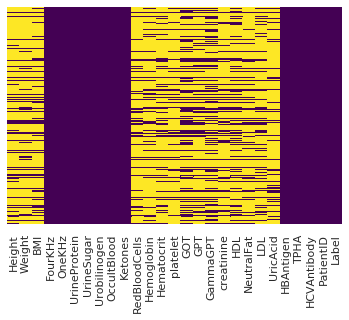

In [149]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [134]:
df.isna().mean().round(4) * 100

Height                    79.40
Weight                    80.66
BMI                       82.39
AbdominalCircumference    86.16
FourKHz                    0.00
OneKHz                     0.00
VitalCapacity             94.34
BloodPressureSecond       90.72
BloodPressureFirst        87.89
UrineProtein               0.00
UrineSugar                 0.00
Urobilinogen               0.00
OccultBlood                0.00
Ketones                    0.00
UrinePH                   87.42
Leukocyte                 90.09
RedBloodCells             80.82
Hemoglobin                79.56
Hematocrit                79.40
MCV                       87.42
MCH                       85.53
MCHC                      86.16
platelet                  83.81
GOT                       61.32
albumin                   89.47
GPT                       70.28
GammaGPT                  65.72
LDH                       91.82
ALP                       85.85
Bilirubin                 86.64
UreaNitrogen              94.18
creatini

In [146]:
df = df.loc[:, df.isnull().mean() < .85]

In [147]:
df.shape

(636, 27)

In [148]:
## ger % of missing values by column
df.isna().mean().round(4) * 100

Height           77.20
Weight           77.52
BMI              75.47
FourKHz           0.00
OneKHz            0.00
UrineProtein      0.00
UrineSugar        0.00
Urobilinogen      0.00
OccultBlood       0.00
Ketones           0.00
RedBloodCells    80.82
Hemoglobin       79.56
Hematocrit       79.40
platelet         83.81
GOT              61.32
GPT              70.28
GammaGPT         65.72
creatinine       77.67
HDL              71.38
NeutralFat       79.09
LDL              76.10
UricAcid         82.86
HBAntigen         0.00
TPHA              0.00
HCVAntibody       0.00
PatientID         0.00
Label             0.00
dtype: float64

In [155]:
df_1 = df.copy()
for col in df_1.columns:
    df_1[col] = df_1.groupby('Label')[col].transform(lambda x: x.fillna(x.mean()))
    
df = df_1.copy()

In [154]:
df_1.groupby('Label').describe()

Height                                                                  \
       count        mean        std  min         25%         50%         75%   
Label                                                                          
0      458.0  155.306389  22.906753  1.0  155.306389  155.306389  155.306389   
1      178.0  146.686486  26.429366  1.0  146.686486  146.686486  146.686486   

             Weight                                                    \
         max  count       mean        std   min        25%        50%   
Label                                                                   
0      190.0  458.0  69.234867  21.388687  22.0  69.234867  69.234867   
1      183.6  178.0  80.671167  24.503163  22.0  80.671167  80.671167   

                           BMI                                         \
             75%    max  count       mean       std    min        25%   
Label                                                                   
0      69.234867  480.0  458.0  25.090261  8.296724   8.93  25.090261   
1      80.671167  373.0  178.0  24.702927  3.767464  17.20  24.702927   

                                    FourKHz                                \
             50%        75%     max   count      mean       std  min  25%   
Label                                                                       
0      25.090261  25.090261  190.10   458.0 -0.681223  0.616084 -1.0 -1.0   
1      24.702927  24.702927   61.01   178.0 -0.561798  0.712361 -1.0 -1.0   

                     OneKHz                                               \
       50%  75%  max  count      mean       std  min  25%  50%  75%  max   
Label                                                                      
0     -1.0 -1.0  1.0  458.0 -0.681223  0.616084 -1.0 -1.0 -1.0 -1.0  1.0   
1     -1.0  0.0  1.0  178.0 -0.522472  0.722559 -1.0 -1.0 -1.0  0.0  1.0   

      UrineProtein                                              UrineSugar  \
             count      mean       std  min  25%  50%  75%  max      count   
Label                                                                        
0            458.0 -0.788210  0.513401 -1.0 -1.0 -1.0 -1.0  1.0      458.0   
1            178.0 -0.870787  0.397933 -1.0 -1.0 -1.0 -1.0  1.0      178.0   

                 ...  NeutralFat           LDL                               \
           mean  ...         75%    max  count        mean        std   min   
Label            ...                                                          
0     -0.836245  ...  105.455000  317.0  458.0  111.786296  16.421109  37.0   
1     -0.898876  ...  119.615152  311.0  178.0  119.727273  19.429247  58.0   

                                                 UricAcid                      \
              25%         50%         75%    max    count      mean       std   
Label                                                                           
0      111.786296  111.786296  111.786296  208.0    458.0  4.973165  1.081174   
1      119.727273  119.727273  119.727273  215.0    178.0  4.373333  1.130218   

                                               HBAntigen                      \
       min       25%       50%       75%   max     count      mean       std   
Label                                                                          
0      1.0  4.973165  4.973165  4.973165  12.0     458.0 -0.901747  0.297982   
1      1.0  4.373333  4.373333  4.373333   8.3     178.0 -0.848315  0.359728   

                                 TPHA                                          \
       min  25%  50%  75%  max  count      mean       std  min  25%  50%  75%   
Label                                                                           
0     -1.0 -1.0 -1.0 -1.0  0.0  458.0 -0.941048  0.235792 -1.0 -1.0 -1.0 -1.0   
1     -1.0 -1.0 -1.0 -1.0  0.0  178.0 -0.859551  0.348433 -1.0 -1.0 -1.0 -1.0   

           HCVAntibody                                              PatientID  \
       max       count   

In [156]:
df.groupby('Label').describe()

Height                                                                  \
       count        mean        std  min         25%         50%         75%   
Label                                                                          
0      458.0  155.306389  22.906753  1.0  155.306389  155.306389  155.306389   
1      178.0  146.686486  26.429366  1.0  146.686486  146.686486  146.686486   

             Weight                                                    \
         max  count       mean        std   min        25%        50%   
Label                                                                   
0      190.0  458.0  69.234867  21.388687  22.0  69.234867  69.234867   
1      183.6  178.0  80.671167  24.503163  22.0  80.671167  80.671167   

                           BMI                                         \
             75%    max  count       mean       std    min        25%   
Label                                                                   
0      69.234867  480.0  458.0  25.090261  8.296724   8.93  25.090261   
1      80.671167  373.0  178.0  24.702927  3.767464  17.20  24.702927   

                                    FourKHz                                \
             50%        75%     max   count      mean       std  min  25%   
Label                                                                       
0      25.090261  25.090261  190.10   458.0 -0.681223  0.616084 -1.0 -1.0   
1      24.702927  24.702927   61.01   178.0 -0.561798  0.712361 -1.0 -1.0   

                     OneKHz                                               \
       50%  75%  max  count      mean       std  min  25%  50%  75%  max   
Label                                                                      
0     -1.0 -1.0  1.0  458.0 -0.681223  0.616084 -1.0 -1.0 -1.0 -1.0  1.0   
1     -1.0  0.0  1.0  178.0 -0.522472  0.722559 -1.0 -1.0 -1.0  0.0  1.0   

      UrineProtein                                              UrineSugar  \
             count      mean       std  min  25%  50%  75%  max      count   
Label                                                                        
0            458.0 -0.788210  0.513401 -1.0 -1.0 -1.0 -1.0  1.0      458.0   
1            178.0 -0.870787  0.397933 -1.0 -1.0 -1.0 -1.0  1.0      178.0   

                 ...  NeutralFat           LDL                               \
           mean  ...         75%    max  count        mean        std   min   
Label            ...                                                          
0     -0.836245  ...  105.455000  317.0  458.0  111.786296  16.421109  37.0   
1     -0.898876  ...  119.615152  311.0  178.0  119.727273  19.429247  58.0   

                                                 UricAcid                      \
              25%         50%         75%    max    count      mean       std   
Label                                                                           
0      111.786296  111.786296  111.786296  208.0    458.0  4.973165  1.081174   
1      119.727273  119.727273  119.727273  215.0    178.0  4.373333  1.130218   

                                               HBAntigen                      \
       min       25%       50%       75%   max     count      mean       std   
Label                                                                          
0      1.0  4.973165  4.973165  4.973165  12.0     458.0 -0.901747  0.297982   
1      1.0  4.373333  4.373333  4.373333   8.3     178.0 -0.848315  0.359728   

                                 TPHA                                          \
       min  25%  50%  75%  max  count      mean       std  min  25%  50%  75%   
Label                                                                           
0     -1.0 -1.0 -1.0 -1.0  0.0  458.0 -0.941048  0.235792 -1.0 -1.0 -1.0 -1.0   
1     -1.0 -1.0 -1.0 -1.0  0.0  178.0 -0.859551  0.348433 -1.0 -1.0 -1.0 -1.0   

           HCVAntibody                                              PatientID  \
       max       count   

In [144]:
## replace missing values with median
# df = df.fillna(df.mean())
## bmi = w / h*h
# bmi * h*h = w
# sq root(w/bmi) = h
import math
df['BMI'] = df.apply(
    lambda row: round(row['Weight']/((row['Height']/100)*(row['Height']/100)),2) if ~np.isnan(row['Height']) and ~np.isnan(row['Weight']) else row['BMI'],
    axis=1
)

df['Height'] = df.apply(
    lambda row: round((math.sqrt(row['Weight']/row['BMI'])), 2) if np.isnan(row['Height']) else row['Height'],
    axis=1
)
    
df['Weight'] = df.apply(
    lambda row: round((((row['Height'] * row['Height'])/10000) *row['BMI']), 2) if np.isnan(row['Weight']) else row['Weight'],
    axis=1
)
# df = df.fillna(0)
# for col in df.columns:
#     df[col] = df.groupby('Label')[col].transform(lambda x: x.fillna(x.mean()))
    


In [13]:
import math

In [12]:
df.describe()

,Height,Weight,BMI,AbdominalCircumference,FourKHz,OneKHz,VitalCapacity,BloodPressureSecond,BloodPressureFirst,UrineProtein,UrineSugar,Urobilinogen,OccultBlood,Ketones,UrinePH,Leukocyte,RedBloodCells,Hemoglobin,Hematocrit,MCV,MCH,MCHC,platelet,GOT,albumin,GPT,GammaGPT,LDH,ALP,Bilirubin,UreaNitrogen,creatinine,eGFR,HDL,NeutralFat,LDL,TotalProtein,AGRatio,Amylase,UricAcid,HBAntigen,TPHA,CRP,HCVAntibody,HbA1c,BloodSugar,FastingBloodSugar,bodyFatPercentage,Lym,TTT,RightEyeCorrection,Prostate,LeftEyeCorrection,PatientID,Label
count,131.00000,123.000000,156.000000,88.000000,636.000000,636.000000,36.000000,59.000000,77.000000,636.000000,636.000000,636.000000,636.000000,636.000000,80.000000,63.000000,122.000000,130.000000,131.000000,80.000000,92.000000,88.000000,103.000000,246.000000,67.000000,189.000000,218.000000,52.000000,90.000000,85.000000,37.000000,142.000000,52.000000,182.000000,133.000000,152.000000,47.000000,35.000000,37.000000,109.000000,636.000000,636.000000,43.000000,636.000000,72.000000,90.000000,53.000000,46.000000,44.000000,32.000000,65.000000,69.000000,65.000000,6.360000e+02,636.000000
mean,169.30229,73.139390,23.816795,84.000114,-0.647799,-0.636792,2.842500,78.266102,112.331169,-0.811321,-0.853774,-0.811321,-0.685535,-0.941824,5.306812,6042.476190,437.672131,13.187308,43.880458,93.102500,32.343478,32.711136,28.548641,21.851963,11.122836,22.938148,35.300322,176.790577,214.056667,1.153190,14.902703,0.855282,77.111731,66.267198,108.968421,114.085000,6.755957,1.548571,70.405405,4.808073,-0.886792,-0.918239,0.127279,-0.858491,5.565556,97.150000,99.633962,20.752391,23.325000,2.834375,2.015385,1.155826,1.781538,4.018718e+06,0.279874
std,8.59545,50.383575,5.761561,16.695178,0.646136,0.650982,1.820528,16.108207,28.371146,0.484985,0.407413,0.531464,0.598037,0.240889,2.151591,2130.547672,177.618239,3.927819,5.754030,18.270215,9.861316,5.201774,15.667738,15.728626,18.318016,14.968578,30.268983,43.999615,76.185619,0.884011,5.175824,0.300148,12.390804,30.685327,69.339146,35.660234,1.166207,0.586115,26.571141,2.666885,0.317096,0.274216,0.133358,0.353306,1.199617,31.127723,24.458622,9.104519,14.418917,2.049958,2.138357,0.770941,2.441816,1.546153e+04,0.449291
min,119.00000,22.000000,8.930000,35.300000,-1.000000,-1.000000,1.000000,31.700000,33.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.100000,320.000000,52.000000,5.150000,29.000000,21.000000,24.000000,11.100000,10.400000,1.000000,1.000000,4.000000,1.000000,31.000000,21.000000,0.200000,6.000000,0.020000,54.000000,23.000000,23.000000,37.000000,3.000000,0.900000,22.000000,1.000000,-1.000000,-1.000000,0.010000,-1.000000,2.000000,63.000000,36.000000,3.000000,8.100000,1.000000,0.200000,0.005000,0.100000,3.956543e+06,0.000000
25%,165.15000,57.250000,20.982500,81.225000,-1.000000,-1.000000,1.000000,69.500000,99.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4.000000,5050.000000,430.000000,12.350000,40.950000,88.950000,29.625000,31.600000,21.200000,10.250000,4.000000,11.100000,14.250000,156.750000,163.000000,0.700000,11.400000,0.707500,69.625000,45.000000,54.700000,90.832500,6.700000,1.000000,50.000000,2.000000,-1.000000,-1.000000,0.034000,-1.000000,5.100000,86.000000,88.000000,15.525000,11.000000,1.000000,0.900000,0.640000,0.700000,4.012782e+06,0.000000
50%,170.00000,64.000000,22.585000,84.900000,-1.000000,-1.000000,2.855000,80.000000,123.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,5.000000,6100.000000,479.000000,13.900000,43.900000,91.000000,31.050000,33.000000,24.900000,21.000000,4.300000,20.000000,27.000000,174.500000,203.000000,1.000000,14.400000,0.830000,80.050000,59.000000,89.000000,117.000000,7.100000,1.540000,67.000000,5.600000,-1.000000,-1.000000,0.100000,-1.000000,5.500000,92.000000,96.000000,20.900000,17.950000,2.000000,1.000000,1.000000,1.000000,4.015757e+06,0.000000
75%,174.30000,73.300000,25.000000,85.132500,0.000000,0.000000,4.235000,84.000000,130.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6.000000,7235.000000,515.000000,15.175

In [11]:
df.groupby('Label').mean()

,Height,Weight,BMI,AbdominalCircumference,FourKHz,OneKHz,VitalCapacity,BloodPressureSecond,BloodPressureFirst,UrineProtein,UrineSugar,Urobilinogen,OccultBlood,Ketones,UrinePH,Leukocyte,RedBloodCells,Hemoglobin,Hematocrit,MCV,MCH,MCHC,platelet,GOT,albumin,GPT,GammaGPT,LDH,ALP,Bilirubin,UreaNitrogen,creatinine,eGFR,HDL,NeutralFat,LDL,TotalProtein,AGRatio,Amylase,UricAcid,HBAntigen,TPHA,CRP,HCVAntibody,HbA1c,BloodSugar,FastingBloodSugar,bodyFatPercentage,Lym,TTT,RightEyeCorrection,Prostate,LeftEyeCorrection,PatientID
Label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,169.298083,72.613256,23.442889,83.874791,-0.681223,-0.681223,2.837877,78.381663,112.465582,-0.788210,-0.836245,-0.805677,-0.674672,-0.956332,5.292600,6042.551882,441.347233,13.270645,43.969970,93.102216,32.165607,32.808052,28.576818,21.307538,11.179238,23.171863,35.296787,176.525516,214.804578,1.142416,14.902071,0.862025,77.178131,66.057360,108.201299,113.542948,6.754707,1.546188,70.364098,4.836550,-0.901747,-0.941048,0.128164,-0.882096,5.547074,96.714301,99.665502,20.815107,23.342631,2.849679,2.011925,1.162920,1.776171,4.018137e+06
1,169.313114,74.493152,23.331438,84.322573,-0.561798,-0.522472,2.854396,77.968758,111.985320,-0.870787,-0.898876,-0.825843,-0.713483,-0.904494,5.343381,6042.281434,428.215970,12.972878,43.650141,93.103230,32.801148,32.461768,28.476140,23.252788,10.977711,22.336792,35.309421,177.472588,212.132266,1.180910,14.904327,0.837932,76.940882,66.807118,110.942253,115.479719,6.759174,1.554703,70.511691,4.734803,-0.848315,-0.859551,0.125002,-0.797753,5.613109,98.271067,99.552809,20.591021,23.279635,2.794996,2.024287,1.137574,1.795350,4.020214e+06


### Overfitting/ Underfitting
1. Check for class imbalance. 
    > Classes are imbalanced with 72:28 ratio
2. Handle the imbalance using SMOTE (Synthetic Minority Oversampling Technique)

In [157]:
accepted = df[df['Label'] == 0]
denied = df[df['Label'] == 1]

accepted_per = round(len(accepted.Label)/(len(accepted.Label)+len(denied.Label)), 2)
denied_per = round(len(denied.Label)/(len(accepted.Label)+len(denied.Label)), 2)

print(accepted_per)
print(denied_per)

0.72
0.28


In [158]:
from imblearn.over_sampling import SMOTE

import warnings
warnings.simplefilter('ignore')

X = df.loc[:, df.columns != 'Label']
y = df.loc[:, df.columns == 'Label']

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Label'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of Accepted applications in oversampled data",len(os_data_y[os_data_y['Label']==0]))
print("Number of denials",len(os_data_y[os_data_y['Label']==1]))
print("Proportion of accepted applications in oversampled data is ",len(os_data_y[os_data_y['Label']==0])/len(os_data_X))
print("Proportion of denied appliations in oversampled data is ",len(os_data_y[os_data_y['Label']==1])/len(os_data_X))

length of oversampled data is  652
Number of Accepted applications in oversampled data 326
Number of denials 326
Proportion of accepted applications in oversampled data is  0.5
Proportion of denied appliations in oversampled data is  0.5


### Feature selection
1. Correlation based
2. p-value based

In [159]:
## correlation based feature selection

corr = df.corr()
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
not_selected = df.columns[~columns]
df = df[selected_columns]

In [160]:
## Recursive feature elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

import warnings
warnings.simplefilter('ignore')

df_vars=df.columns.values.tolist()
y=['Label']
X=[i for i in df_vars if i not in y]

logreg = LogisticRegression()
rfe = RFE(logreg,13)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False  True  True  True  True  True False  True  True False False  True
 False False False False False  True False False False  True  True  True
  True False]
[13  1  1  1  1  1  7  1  1  2 12  1  5  9  3  4 10  1  8 11  6  1  1  1
  1 14]


In [161]:
keep_col = df.columns[:-1][rfe.support_ == True]
print("Selected features:")
print(keep_col)

Selected features:
Index(['Weight', 'BMI', 'FourKHz', 'OneKHz', 'UrineProtein', 'Urobilinogen',
       'OccultBlood', 'Hemoglobin', 'creatinine', 'UricAcid', 'HBAntigen',
       'TPHA', 'HCVAntibody'],
      dtype='object')


In [21]:
df.columns.shape

(54,)

In [22]:
rfe.support_.shape

(54,)

In [21]:
## p-value based feature selection

selected_columns = selected_columns[:-1]
df = df.fillna(df.median())
import statsmodels.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.05
data_modeled, selected_columns = backwardElimination(df.iloc[:,:-1].values, df.iloc[:,-1].values, SL, selected_columns)

In [22]:
selected_columns

Index(['OneKHz', 'UrineProtein', 'Urobilinogen', 'RedBloodCells', 'Hemoglobin',
       'MCH', 'MCHC', 'TPHA', 'TTT', 'PatientID'],
      dtype='object')

In [32]:
# df = pd.DataFrame(data = data_modeled, columns = selected_columns)
result = pd.DataFrame()
result['Label'] = df.iloc[:,-1]

In [33]:
x_train, x_test, y_train, y_test = train_test_split(df.values, result.values, test_size = 0.2)

In [28]:
df.head(10)

,OneKHz,UrineProtein,Urobilinogen,RedBloodCells,Hemoglobin,MCH,MCHC,TPHA,TTT,PatientID
0,0.0,-1.0,0.0,479.0,13.9,31.05,33.0,-1.0,2.0,3956543.0
1,0.0,-1.0,1.0,482.0,13.0,30.70,32.5,-1.0,3.0,3964292.0
2,-1.0,-1.0,-1.0,479.0,13.9,31.05,33.0,-1.0,2.0,3965820.0
3,-1.0,-1.0,-1.0,479.0,13.9,31.05,33.0,-1.0,2.0,3965847.0
4,-1.0,-1.0,-1.0,560.0,16.9,31.05,33.0,-1.0,2.0,3967976.0
5,-1.0,-1.0,-1.0,479.0,13.9,31.05,33.0,-1.0,2.0,3968855.0
6,1.0,0.0,1.0,479.0,14.0,31.05,33.0,0.0,2.0,3978258.0
7,-1.0,-1.0,-1.0,479.0,13.9,31.05,33.0,-1.0,2.0,3978282.0
8,-1.0,-1.0,-1.0,479.0,13.9,31.05,33.0,-1.0,2.0,3978288.0
9,-1.0,-1.0,-1.0,479.0,13.9,31.05,33.0,-1.0,2.0,3978292.0


### Model

In [162]:
## Logistic regression model
X=os_data_X[keep_col]
y=os_data_y['Label']

import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.239604
         Iterations 8
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.654      
Dependent Variable: Label            AIC:              338.4435   
Date:               2019-10-17 18:33 BIC:              396.6841   
No. Observations:   652              Log-Likelihood:   -156.22    
Df Model:           12               LL-Null:          -451.93    
Df Residuals:       639              LLR p-value:      7.1981e-119
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     8.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
Weight         0.4080    0.0288   14.1586  0.0000   0.3515   0.4644
BMI           -1.0010    0.0755  -13.2584  0.0000

In [163]:
keep_col_2 = ['Weight', 'BMI', 'FourKHz', 'UrineProtein', 'Urobilinogen',
       'Hemoglobin', 'creatinine', 'HBAntigen',
       'TPHA']

# keep_col_2 = ['FourKHz', 'VitalCapacity', 'UrineSugar', 'Urobilinogen',
#        'creatinine', 'UricAcid', 'TPHA', 'HbA1c'
#        ] 11, 67% accuracy

# keep_col_2 = ['FourKHz', 'VitalCapacity', 'UrineSugar', 'Urobilinogen',
#        'creatinine', 'TPHA']
X=os_data_X[keep_col_2]
y=os_data_y['Label']

import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.240493
         Iterations 8
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.653      
Dependent Variable: Label            AIC:              331.6032   
Date:               2019-10-17 18:33 BIC:              371.9236   
No. Observations:   652              Log-Likelihood:   -156.80    
Df Model:           8                LL-Null:          -451.93    
Df Residuals:       643              LLR p-value:      2.9028e-122
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     8.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
Weight         0.4081    0.0284   14.3509  0.0000   0.3523   0.4638
BMI           -1.0030    0.0746  -13.4387  0.0000

In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Model Performance
1. Confusion Matrix
2. ROC curve

In [165]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.93


In [166]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[57  5]
 [ 4 65]]


In [167]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93        62
           1       0.93      0.94      0.94        69

    accuracy                           0.93       131
   macro avg       0.93      0.93      0.93       131
weighted avg       0.93      0.93      0.93       131



In [168]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9312977099236641
Precision: 0.9285714285714286
Recall: 0.9420289855072463


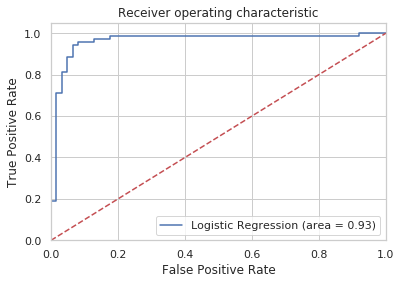

In [169]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

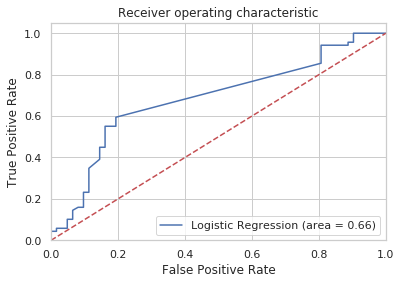

In [52]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [98]:
## calculate or update BMI
# df['BMI'] = df['Weight'] / ((df['Height']/100) * (df['Height']/100))
# df['BMI'] = df.apply(
#     lambda row: round(row['Weight']/((row['Height']/100)*(row['Height']/100)),2) if np.isnan(row['BMI']) else row['BMI'],
#     axis=1
# )


df_train['BMI'] = df_train.apply(
    lambda row: round(row['Weight']/((row['Height']/100)*(row['Height']/100)),2) if np.isnan(row['BMI']) else row['BMI'],
    axis=1
)


df_test['BMI'] = df_test.apply(
    lambda row: round(row['Weight']/((row['Height']/100)*(row['Height']/100)),2) if np.isnan(row['BMI']) else row['BMI'],
    axis=1
)

In [96]:
df.shape

(636, 53)

In [61]:
df.groupby('Label').size()

Label
0    458
1    178
2    141
3    220
dtype: int64

In [90]:
train_size = 458+178
test_size = 141+220
print(train_size)
print(test_size)

636
361


In [97]:
accepted = df[df['Label'] == 0]
denied = df[df['Label'] == 1]
# pending = df[df['Label'] == 'Pending']
# referred = df[df['Label'] == 'Referred']

In [98]:
accepted_per = round(len(accepted.Label)/(len(accepted.Label)+len(denied.Label)), 2)
denied_per = round(len(denied.Label)/(len(accepted.Label)+len(denied.Label)), 2)
# denied_per = denied.count()/(accepted.count()+denied.count())

In [99]:
print(accepted_per)
print(denied_per)

## classes are imbalanced

0.72
0.28


In [74]:
df_train = df.copy()
df_test = df.copy()
df_train = df_train[df_train['Label'].isin(['Accepted', 'Denied'])]
df_test = df_test[df_test['Label'].isin(['Pending', 'Referred'])]

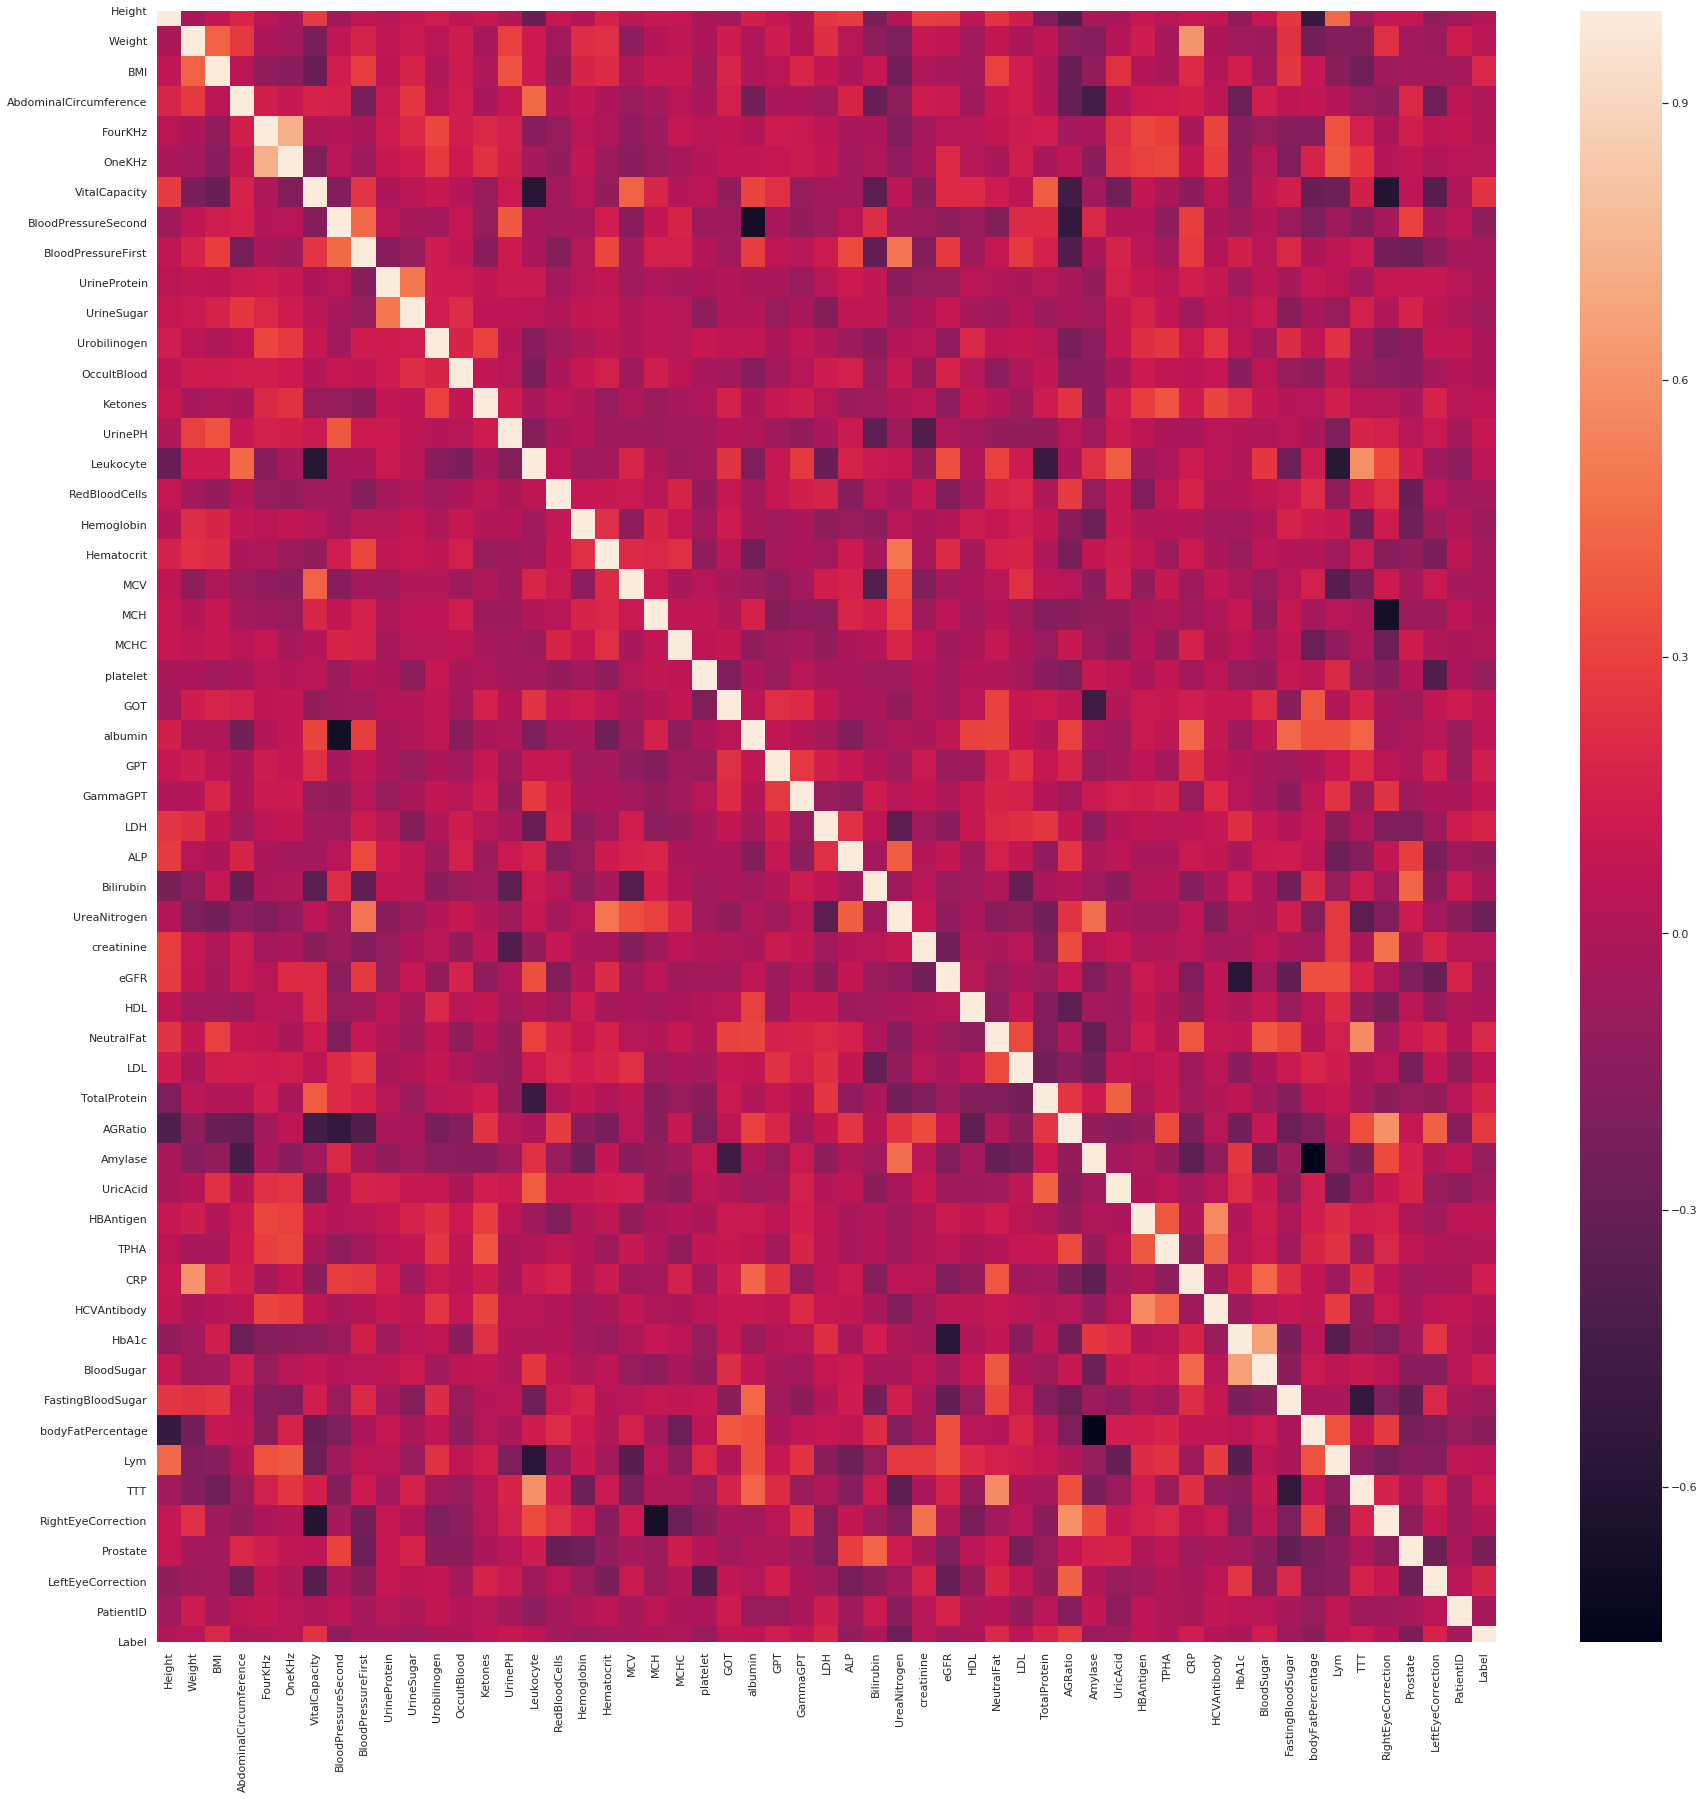

In [94]:
# fig, ax = plt.subplots(figsize=(30, 30))
# sns.heatmap(df.dropna(axis=0, how='all').corr(), ax=ax)
# plt.show()

fig, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(df.corr(), ax=ax)
plt.show()

# plt.figure(figsize=(30,30))
# sns.heatmap(df.corr());

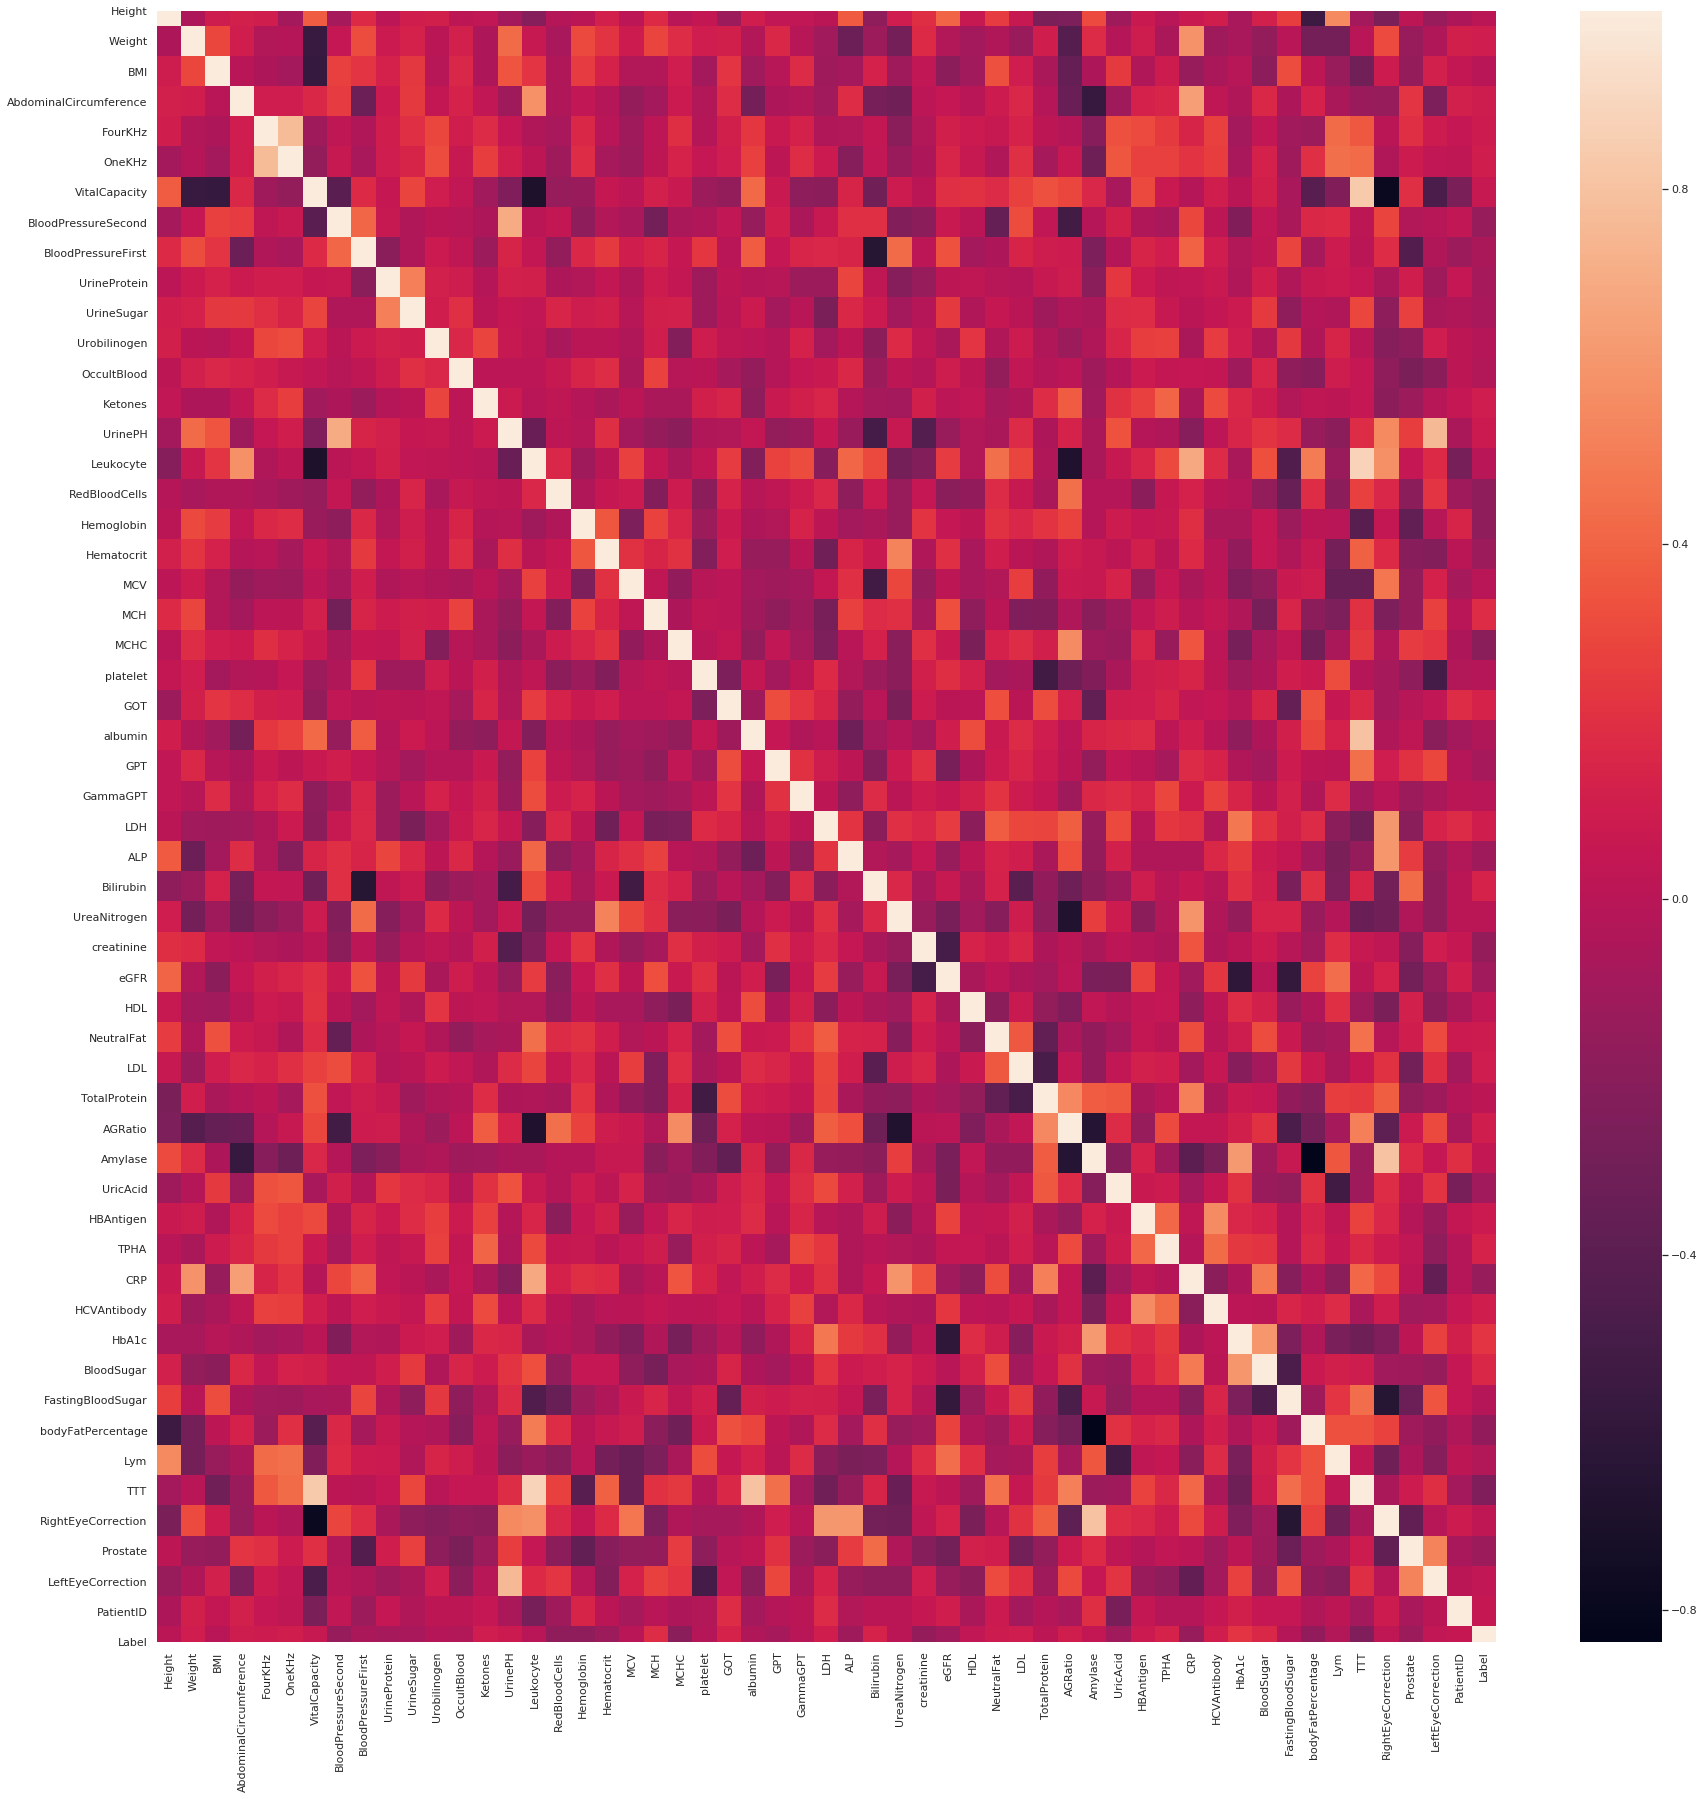

In [100]:
fig, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(df_train.corr(), ax=ax)
plt.show()

In [45]:
### TTT strongly correlated to Vital Capacity, Leukocyte, albumin, FourKHz, OneKHz
### FourKHz and OneKHz strongly correlated
## ['FourKHz', 'OneKHz', 'UrineProtein', 'UrineSugar', 'Urobilinogen', 'OccultBlood', 'Ketones', 'HBAntigen',
#                'TPHA', 'HCVAntibody', 'Label']
df.groupby('FourKHz').describe()

Height                                                               \
         count        mean        std    min    25%     50%      75%    max   
FourKHz                                                                       
-1        56.0  168.073214  10.385015  119.0  164.5  169.45  173.450  185.6   
 0        42.0  170.240476   7.131143  155.5  166.5  170.10  174.025  190.0   
 1        33.0  170.193939   6.708620  151.9  167.7  171.20  174.300  184.7   

        Weight                                                        BMI  \
         count       mean        std   min   25%   50%   75%    max count   
FourKHz                                                                     
-1        47.0  74.040745  51.141128  22.0  54.7  65.0  75.5  373.0  46.0   
 0        47.0  74.287872  61.313310  51.0  59.4  64.0  71.2  480.0  30.0   
 1        29.0  69.817241  23.934003  41.0  57.5  64.0  71.9  160.7  36.0   

                                                                 \
              mean       std   min     25%    50%     75%   max   
FourKHz                                                           
-1       23.495652  5.649541  13.5  19.450  22.10  25.000  40.7   
 0       23.913333  3.931810  18.2  21.850  23.25  25.350  34.6   
 1       22.886389  3.747210  13.5  20.975  22.40  25.925  29.5   

        AbdominalCircumference                                             \
                         count       mean        std   min     25%    50%   
FourKHz                                                                     
-1                        30.0  83.680333  17.881463  35.3  84.000  85.00   
 0                        32.0  81.090625   9.842415  39.0  80.150  84.05   
 1                        26.0  87.950000  21.254745  65.0  84.225  85.00   

                      OneKHz                                               \
           75%    max  count      mean       std  min  25%  50%  75%  max   
FourKHz                                                                     
-1       86.85  130.0  472.0 -0.904661  0.353057 -1.0 -1.0 -1.0 -1.0  1.0   
 0       85.00  100.0  104.0 -0.173077  0.471361 -1.0  0.0  0.0  0.0  1.0   
 1       89.90  185.0   60.0  0.666667  0.705106 -1.0  1.0  1.0  1.0  1.0   

        VitalCapacity                                                   \
                count      mean       std  min   25%   50%   75%   max   
FourKHz                                                                  
-1               11.0  3.619091  2.156638  1.0  1.82  4.00  4.62  7.00   
 0               10.0  1.763000  1.300769  1.0  1.00  1.00  2.50  4.59   
 1               15.0  2.992667  1.595460  1.0  1.00  3.86  4.25  5.15   

        BloodPressureSecond             ...     Lym         TTT            \
                      count       mean  ...     75%   max count      mean   
FourKHz                                 ...                                 
-1                     27.0  76.618519  ...  19.725  51.9  17.0  2.411765   
 0                     12.0  83.666667  ...  32.600  38.2   8.0  2.312500   
 1                     20.0  77.250000  ...  41.500  71.0   7.0  4.457143   

                                              RightEyeCorrection            \
              std  min   25%   50%   75%  max              count      mean   
FourKHz                                                                      
-1       1.872793  1.0  1.00  2.00  3.00  7.0               29.0  1.775862   
 0       1.533844  1.0  1.00  1.75  3.25  5.0               17.0  2.776471   
 1       2.381776  1.0  3.15  5.00  5.25  8.4               19.0  1.700000   

                                             Prostate                      \
              std  min   25%  50%   75%  max    count      mean       std   
FourKHz                                                                     
-1       1.948196  0.3  0.60  1.0  2.00  7.0     35.0  1.020143  0.532130   
 0       2.542767  0.2  1.00  1.2  4.00  8.0     20.0  1

In [102]:
df_train.groupby('Label').describe()

Height                                                               \
       count        mean       std    min      25%    50%      75%    max   
Label                                                                       
0       99.0  169.282828  8.882051  119.0  166.500  170.0  173.100  190.0   
1       32.0  169.362500  7.773352  157.2  161.875  170.0  175.025  183.6   

      Weight                                                              \
       count       mean        std   min     25%    50%       75%    max   
Label                                                                      
0       99.0  70.705354  45.404214  22.0  57.800  64.00  72.30000  480.0   
1       24.0  83.179792  67.457047  22.0  54.625  65.85  85.12875  373.0   

         BMI                                                        \
       count       mean       std    min   25%   50%    75%    max   
Label                                                                
0      115.0  23.813565  5.908477   8.93  21.5  22.6  24.95  57.80   
1       41.0  23.825854  5.398055  17.20  20.1  22.5  26.00  39.84   

      AbdominalCircumference                                                 \
                       count       mean        std   min    25%   50%   75%   
Label                                                                         
0                       69.0  83.168261  16.503291  39.0  81.00  84.9  85.0   
1                       19.0  87.021053  17.492684  35.3  83.45  85.0  91.5   

             FourKHz                                              OneKHz  \
         max   count      mean       std  min  25%  50%  75%  max  count   
Label                                                                      
0      185.0   458.0 -0.681223  0.616084 -1.0 -1.0 -1.0 -1.0  1.0  458.0   
1      130.0   178.0 -0.561798  0.712361 -1.0 -1.0 -1.0  0.0  1.0  178.0   

                                                   VitalCapacity            \
           mean       std  min  25%  50%  75%  max         count      mean   
Label                                                                        
0     -0.681223  0.616084 -1.0 -1.0 -1.0 -1.0  1.0          19.0  2.731053   
1     -0.522472  0.722559 -1.0 -1.0 -1.0  0.0  1.0          17.0  2.967059   

       ... bodyFatPercentage         Lym                                   \
       ...               75%   max count       mean        std  min   25%   
Label  ...                                                                  
0      ...            26.975  53.0  29.0  23.603448  13.665898  9.0  11.0   
1      ...            23.550  28.0  15.0  22.786667  16.265953  8.1  10.9   

                          TTT                                               \
        50%   75%   max count      mean       std  min  25%  50%  75%  max   
Label                                                                        
0      15.4  33.1  51.9  23.0  3.139130  2.147459  1.0  1.0  3.0  4.5  8.4   
1      18.9  28.9  71.0   9.0  2.055556  1.628735  1.0  1.0  1.0  2.0  5.5   

      RightEyeCorrection                                                 \
                   count      mean       std  min   25%  50%   75%  max   
Label                                                                     
0                   51.0  1.984314  2.219132  0.2  0.85  1.0  1.75  9.0   
1                   14.0  2.128571  1.884932  0.3  1.00  1.6  2.75  7.0   

      Prostate                                                     \
         count      mean       std    min   25%  50%     75%  max   
Label                                                               
0         34.0  1.251382  0.826867  0.005  0.81  1.0  1.2875  3.0   
1         35.0  1.063000  0.712109  0.295  0.59  1.0  1.1315  3.0   

      LeftEyeCorrection                                                   \
                  count      mean       std  min   25%  50%    75%   max   
Label                                                                

In [61]:
df.describe()

,Height,Weight,BMI,AbdominalCircumference,FourKHz,OneKHz,VitalCapacity,BloodPressureSecond,BloodPressureFirst,UrineProtein,UrineSugar,Urobilinogen,OccultBlood,Ketones,UrinePH,Leukocyte,RedBloodCells,Hemoglobin,Hematocrit,MCV,MCH,MCHC,platelet,GOT,albumin,GPT,GammaGPT,LDH,ALP,Bilirubin,UreaNitrogen,creatinine,eGFR,HDL,NeutralFat,LDL,TotalProtein,AGRatio,Amylase,UricAcid,HBAntigen,TPHA,CRP,HCVAntibody,HbA1c,BloodSugar,FastingBloodSugar,bodyFatPercentage,Lym,TTT,RightEyeCorrection,Prostate,LeftEyeCorrection,PatientID,Label
count,131.00000,123.000000,112.000000,88.000000,636.000000,636.000000,36.000000,59.000000,77.000000,636.000000,636.000000,636.000000,636.000000,636.000000,80.000000,63.000000,122.000000,130.000000,131.000000,80.000000,92.000000,88.000000,103.000000,246.000000,67.000000,189.000000,218.000000,52.000000,90.000000,85.000000,37.000000,142.000000,52.000000,182.000000,133.000000,152.000000,47.000000,35.000000,37.000000,109.000000,636.000000,636.000000,43.000000,636.000000,72.000000,90.000000,53.000000,46.000000,44.000000,32.000000,65.000000,69.000000,65.000000,6.360000e+02,636.000000
mean,169.30229,73.139390,23.411696,84.000114,-0.647799,-0.636792,2.842500,78.266102,112.331169,-0.811321,-0.853774,-0.811321,-0.685535,-0.941824,5.306812,6042.476190,437.672131,13.187308,43.880458,93.102500,32.343478,32.711136,28.548641,21.851963,11.122836,22.938148,35.300322,176.790577,214.056667,1.153190,14.902703,0.855282,77.111731,66.267198,108.968421,114.085000,6.755957,1.548571,70.405405,4.808073,-0.886792,-0.918239,0.127279,-0.858491,5.565556,97.150000,99.633962,20.752391,23.325000,2.834375,2.015385,1.155826,1.781538,4.018718e+06,0.279874
std,8.59545,50.383575,4.643951,16.695178,0.646136,0.650982,1.820528,16.108207,28.371146,0.484985,0.407413,0.531464,0.598037,0.240889,2.151591,2130.547672,177.618239,3.927819,5.754030,18.270215,9.861316,5.201774,15.667738,15.728626,18.318016,14.968578,30.268983,43.999615,76.185619,0.884011,5.175824,0.300148,12.390804,30.685327,69.339146,35.660234,1.166207,0.586115,26.571141,2.666885,0.317096,0.274216,0.133358,0.353306,1.199617,31.127723,24.458622,9.104519,14.418917,2.049958,2.138357,0.770941,2.441816,1.546153e+04,0.449291
min,119.00000,22.000000,13.500000,35.300000,-1.000000,-1.000000,1.000000,31.700000,33.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.100000,320.000000,52.000000,5.150000,29.000000,21.000000,24.000000,11.100000,10.400000,1.000000,1.000000,4.000000,1.000000,31.000000,21.000000,0.200000,6.000000,0.020000,54.000000,23.000000,23.000000,37.000000,3.000000,0.900000,22.000000,1.000000,-1.000000,-1.000000,0.010000,-1.000000,2.000000,63.000000,36.000000,3.000000,8.100000,1.000000,0.200000,0.005000,0.100000,3.956543e+06,0.000000
25%,165.15000,57.250000,20.750000,81.225000,-1.000000,-1.000000,1.000000,69.500000,99.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4.000000,5050.000000,430.000000,12.350000,40.950000,88.950000,29.625000,31.600000,21.200000,10.250000,4.000000,11.100000,14.250000,156.750000,163.000000,0.700000,11.400000,0.707500,69.625000,45.000000,54.700000,90.832500,6.700000,1.000000,50.000000,2.000000,-1.000000,-1.000000,0.034000,-1.000000,5.100000,86.000000,88.000000,15.525000,11.000000,1.000000,0.900000,0.640000,0.700000,4.012782e+06,0.000000
50%,170.00000,64.000000,22.800000,84.900000,-1.000000,-1.000000,2.855000,80.000000,123.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,5.000000,6100.000000,479.000000,13.900000,43.900000,91.000000,31.050000,33.000000,24.900000,21.000000,4.300000,20.000000,27.000000,174.500000,203.000000,1.000000,14.400000,0.830000,80.050000,59.000000,89.000000,117.000000,7.100000,1.540000,67.000000,5.600000,-1.000000,-1.000000,0.100000,-1.000000,5.500000,92.000000,96.000000,20.900000,17.950000,2.000000,1.000000,1.000000,1.000000,4.015757e+06,0.000000
75%,174.30000,73.300000,25.125000,85.132500,0.000000,0.000000,4.235000,84.000000,130.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6.000000,7235.000000,515.000000,15.17

In [64]:
df_test.describe()

,Height,Weight,BMI,AbdominalCircumference,FourKHz,OneKHz,VitalCapacity,BloodPressureSecond,BloodPressureFirst,UrineProtein,UrineSugar,Urobilinogen,OccultBlood,Ketones,UrinePH,Leukocyte,RedBloodCells,Hemoglobin,Hematocrit,MCV,MCH,MCHC,platelet,GOT,albumin,GPT,GammaGPT,LDH,ALP,Bilirubin,UreaNitrogen,creatinine,eGFR,HDL,NeutralFat,LDL,TotalProtein,AGRatio,Amylase,UricAcid,HBAntigen,TPHA,CRP,HCVAntibody,HbA1c,BloodSugar,FastingBloodSugar,bodyFatPercentage,Lym,TTT,RightEyeCorrection,Prostate,LeftEyeCorrection,PatientID,Label
count,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,6.360000e+02,636.000000
mean,169.856289,65.767524,22.907720,84.775487,-0.647799,-0.636792,2.854292,79.839151,121.708333,-0.811321,-0.853774,-0.811321,-0.685535,-0.941824,5.038593,6094.301887,471.072327,13.754324,43.895975,91.264465,31.237107,32.960031,25.490896,21.329533,5.018758,20.873129,29.845079,174.687280,204.564623,1.020473,14.429245,0.835645,79.809764,61.079607,93.175786,116.303333,7.074575,1.540472,67.198113,5.464277,-0.886792,-0.918239,0.101844,-0.858491,5.507421,92.728774,96.302830,20.889324,18.321855,2.041981,1.103774,1.016906,1.079874,4.018718e+06,0.279874
std,3.899377,22.377738,1.955563,6.187468,0.646136,0.650982,0.427420,4.894225,10.414814,0.484985,0.407413,0.531464,0.598037,0.240889,0.765704,665.955339,79.225987,1.793565,2.603508,6.481885,3.760760,1.928000,6.421898,9.778650,6.266602,8.254771,18.128542,12.485254,28.781656,0.325727,1.237992,0.141827,3.602791,16.709134,32.641868,17.433897,0.326552,0.135638,6.376759,1.139671,0.317096,0.274216,0.034975,0.353306,0.401668,11.791126,7.070983,2.423988,3.992743,0.488335,0.745391,0.256903,0.810601,1.546153e+04,0.449291
min,119.000000,22.000000,13.500000,35.300000,-1.000000,-1.000000,1.000000,31.700000,33.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.100000,320.000000,52.000000,5.150000,29.000000,21.000000,24.000000,11.100000,10.400000,1.000000,1.000000,4.000000,1.000000,31.000000,21.000000,0.200000,6.000000,0.020000,54.000000,23.000000,23.000000,37.000000,3.000000,0.900000,22.000000,1.000000,-1.000000,-1.000000,0.010000,-1.000000,2.000000,63.000000,36.000000,3.000000,8.100000,1.000000,0.200000,0.005000,0.100000,3.956543e+06,0.000000
25%,170.000000,64.000000,22.800000,84.900000,-1.000000,-1.000000,2.855000,80.000000,123.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,5.000000,6100.000000,479.000000,13.900000,43.900000,91.000000,31.050000,33.000000,24.900000,21.000000,4.300000,20.000000,27.000000,174.500000,203.000000,1.000000,14.400000,0.830000,80.050000,59.000000,89.000000,117.000000,7.100000,1.540000,67.000000,5.600000,-1.000000,-1.000000,0.100000,-1.000000,5.500000,92.000000,96.000000,20.900000,17.950000,2.000000,1.000000,1.000000,1.000000,4.012782e+06,0.000000
50%,170.000000,64.000000,22.800000,84.900000,-1.000000,-1.000000,2.855000,80.000000,123.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,5.000000,6100.000000,479.000000,13.900000,43.900000,91.000000,31.050000,33.000000,24.900000,21.000000,4.300000,20.000000,27.000000,174.500000,203.000000,1.000000,14.400000,0.830000,80.050000,59.000000,89.000000,117.000000,7.100000,1.540000,67.000000,5.600000,-1.000000,-1.000000,0.100000,-1.000000,5.500000,92.000000,96.000000,20.900000,17.950000,2.000000,1.000000,1.000000,1.000000,4.015757e+06,0.000000
75%,170.000000,64.000000,22.800000,84.900000,0.000000,0.000000,2.855000,80.000000,123.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,5.000000,6100.0

In [103]:
# median = df['Weight'].median()
# df = df.fillna({'Weight': df['Weight'].median()})
# df = df.fillna({'Height': df['Height'].median(), 
#                 'VitalCapacity': df['VitalCapacity'].mean(),
#                 'BloodPressureSecond': df['BloodPressureSecond'].median(),
#                 'BloodPressureFirst': df['BloodPressureFirst'].median(),
#                 'UrinePH'})
df_test = df_train.fillna(df_train.median())



In [104]:
df_test.corr()

,Height,Weight,BMI,AbdominalCircumference,FourKHz,OneKHz,VitalCapacity,BloodPressureSecond,BloodPressureFirst,UrineProtein,UrineSugar,Urobilinogen,OccultBlood,Ketones,UrinePH,Leukocyte,RedBloodCells,Hemoglobin,Hematocrit,MCV,MCH,MCHC,platelet,GOT,albumin,GPT,GammaGPT,LDH,ALP,Bilirubin,UreaNitrogen,creatinine,eGFR,HDL,NeutralFat,LDL,TotalProtein,AGRatio,Amylase,UricAcid,HBAntigen,TPHA,CRP,HCVAntibody,HbA1c,BloodSugar,FastingBloodSugar,bodyFatPercentage,Lym,TTT,RightEyeCorrection,Prostate,LeftEyeCorrection,PatientID,Label
Height,1.000000,-0.040895,0.057601,0.080658,0.034434,-0.071904,0.106600,-0.032083,0.108885,-0.005542,0.040608,0.057863,-0.000782,0.012268,-0.031099,-0.022544,0.000390,0.002032,0.046853,0.004214,0.013852,0.000767,0.016449,-0.062524,0.034732,0.013115,0.014520,0.004434,0.121689,-0.073653,0.045594,0.068853,0.091944,0.017549,0.129090,0.039587,-0.102852,-0.032916,0.044897,-0.039057,0.027952,-0.015062,0.017108,0.044391,-0.040823,0.081049,0.136687,-0.293269,0.073360,0.003239,-0.033102,0.007433,-0.046424,-0.027129,0.004657
Weight,-0.040895,1.000000,0.226376,0.027224,0.046289,0.044008,-0.033247,0.033141,0.037377,0.076891,0.112193,0.041226,0.074550,-0.011447,0.016094,0.006668,-0.037831,0.055098,0.034797,-0.000866,0.000748,0.016966,0.000517,0.063384,-0.000429,0.086612,0.027157,-0.010539,-0.028314,-0.013097,-0.147526,0.015034,0.003436,-0.028659,-0.020445,-0.062807,0.033586,-0.010022,0.006556,-0.002454,0.088319,-0.002283,0.016513,-0.028516,-0.016102,-0.048026,-0.003526,-0.044040,-0.059256,-0.008450,0.172400,-0.015193,-0.001383,0.052085,0.022821
BMI,0.057601,0.226376,1.000000,-0.011247,0.052563,0.022341,-0.162804,0.064496,0.059208,0.115499,0.181459,0.052025,0.097770,0.000691,0.051919,0.037512,-0.020451,0.120997,0.049293,-0.005869,-0.007177,0.017644,-0.026996,0.149458,-0.017703,0.013023,0.162719,-0.027627,-0.038711,0.043386,-0.028870,0.026143,-0.045734,-0.034652,0.147395,0.063401,0.001320,-0.049177,-0.006483,0.121373,0.019220,0.110035,-0.033525,0.008902,0.007237,-0.075406,0.064432,0.007025,-0.030005,-0.023119,0.035153,-0.038765,0.080419,0.030833,-0.003517
AbdominalCircumference,0.080658,0.027224,-0.011247,1.000000,0.025443,0.026415,0.032551,0.070660,-0.117880,0.024372,0.101634,0.012332,0.039244,0.012264,-0.011870,0.105420,-0.014636,0.015159,-0.006402,-0.014379,-0.004449,0.020472,-0.003877,0.077011,-0.073035,-0.016367,-0.018299,-0.039440,0.090278,-0.069592,-0.030502,0.008728,0.013030,0.004363,0.061783,0.076947,-0.003799,-0.097969,-0.053564,-0.040798,0.056486,0.076271,0.059774,0.004622,-0.004919,0.109635,-0.006663,0.022315,-0.011754,-0.031405,-0.021966,0.035163,-0.100997,0.045927,0.035384
FourKHz,0.034434,0.046289,0.052563,0.025443,1.000000,0.766173,-0.037815,-0.014925,-0.106588,0.109232,0.198883,0.296875,0.104167,0.181802,0.048208,-0.019388,-0.108417,0.033879,-0.001871,-0.016033,0.048760,0.077534,0.058158,0.100242,0.180163,0.116838,0.183422,0.002276,0.029005,0.072394,-0.033175,0.013328,-0.014117,0.129494,0.122306,0.054700,-0.065717,-0.004235,-0.029957,0.087087,0.304693,0.246072,0.092045,0.271122,-0.028776,0.068368,-0.002356,-0.049780,0.206478,0.137233,0.109717,0.113657,0.117287,0.051320,0.083042
OneKHz,-0.071904,0.044008,0.022341,0.026415,0.766173,1.000000,-0.050636,-0.000417,-0.104623,0.101831,0.143822,0.315963,0.062127,0.256698,0.074024,0.001461,-0.116968,0.049569,-0.043365,-0.020859,0.047362,0.049076,0.087809,0.089322,0.197146,0.084578,0.216394,0.041338,-0.056182,0.064329,-0.012615,-0.006378,0.006086,0.121818,0.055064,0.091047,-0.086874,0.021956,-0.072749,0.116241,0.273492,0.274479,0.099458,0.255474,-0.016227,0.099023,-0.004569,0.069426,0.201577,0.114940,0.082850,0.071243,0.088782,0.031762,0.109566
VitalCapacity,0.106600,-0.033247,-0.162804,0.032551,-0.037815,-0.050636,1.000000,-0.133830,0.022114,0.013978,0.065753,0.034801,0.007556,-0.044950,-0.042102,-0.070142,-0.036149,-0.035205,0.016215,0.004268,0.092162,0.022308,-0.035015,-0.031743,0.240397,0.022000,-0.043265,-0.046537,0.076868,-0.072604,0.023006,0.003183,-0.022959,0.106

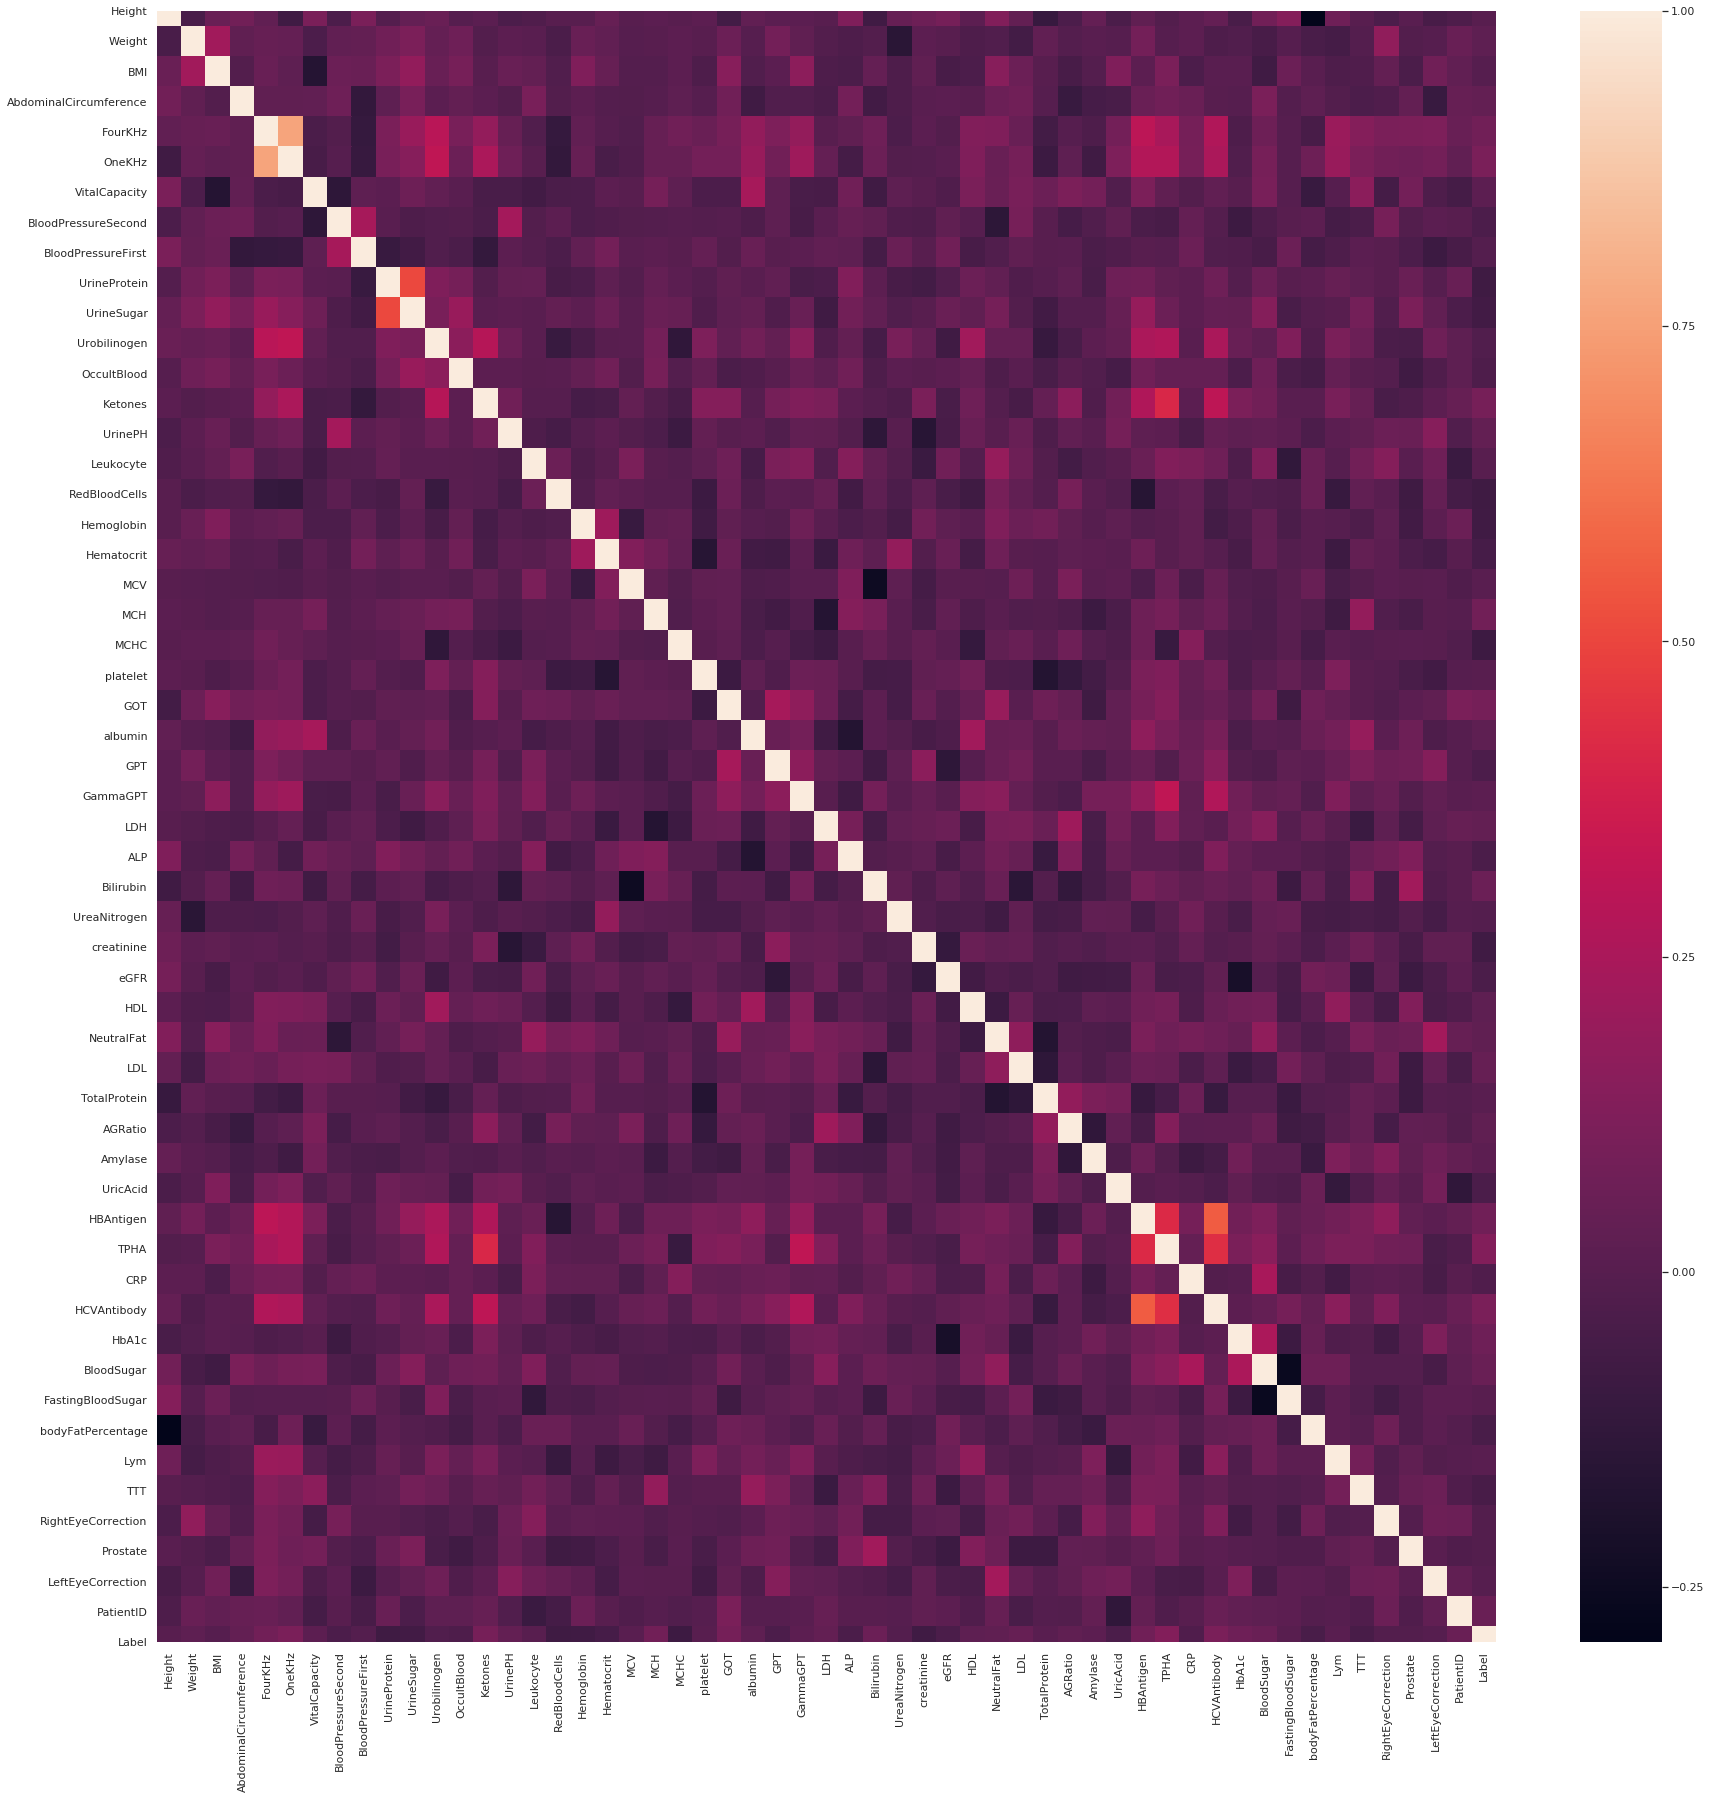

In [105]:
fig, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(df_test.corr(), ax=ax)
plt.show()

In [18]:
df = df.drop(['Label'], axis=1)

In [81]:
df = df_test.copy()

In [41]:
### Remove or fill missing values
accepted.isnull().sum()

Height                    359
Weight                    359
BMI                       379
AbdominalCircumference    389
FourKHz                     0
OneKHz                      0
VitalCapacity             439
BloodPressureSecond       410
BloodPressureFirst        399
UrineProtein                0
UrineSugar                  0
Urobilinogen                0
OccultBlood                 0
Ketones                     0
UrinePH                   406
Leukocyte                 409
RedBloodCells             372
Hemoglobin                362
Hematocrit                363
MCV                       406
MCH                       399
MCHC                      403
platelet                  388
GOT                       290
albumin                   420
GPT                       333
GammaGPT                  313
LDH                       427
ALP                       397
Bilirubin                 403
UreaNitrogen              425
creatinine                363
eGFR                      424
HDL       

In [108]:
df = df_test.copy()

In [109]:
## model - logistic regression
from imblearn.over_sampling import SMOTE

import warnings
warnings.simplefilter('ignore')

X = df.loc[:, df.columns != 'Label']
y = df.loc[:, df.columns == 'Label']

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Label'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of Accepted applications in oversampled data",len(os_data_y[os_data_y['Label']==0]))
print("Number of denials",len(os_data_y[os_data_y['Label']==1]))
print("Proportion of accepted applications in oversampled data is ",len(os_data_y[os_data_y['Label']==0])/len(os_data_X))
print("Proportion of denied appliations in oversampled data is ",len(os_data_y[os_data_y['Label']==1])/len(os_data_X))


length of oversampled data is  652
Number of Accepted applications in oversampled data 326
Number of denials 326
Proportion of accepted applications in oversampled data is  0.5
Proportion of denied appliations in oversampled data is  0.5


In [113]:
## Recursive feature elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

import warnings
warnings.simplefilter('ignore')

df_vars=df.columns.values.tolist()
y=['Label']
X=[i for i in df_vars if i not in y]

logreg = LogisticRegression()
rfe = RFE(logreg, 10)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False False False  True False  True False False False  True  True
 False False False False False False False False False False False False
 False False False False False  True False  True False False False False
 False  True False False False  True False  True False False False False
 False  True False False False False]
[32 39 19 26  1  5  1 23 24  6  1  1 13 31  7 44 42 12 18 17 11 10 36 22
 29 28 33 41 37  1 21  1 20 30 38 43  9  1 40  4 35  1  8  1  3 34 25 16
 27  1 14  2 15 45]


In [114]:
# rfe.support_


Selected features:
Index(['FourKHz', 'VitalCapacity', 'UrineSugar', 'Urobilinogen', 'Bilirubin',
       'creatinine', 'AGRatio', 'TPHA', 'HCVAntibody', 'TTT'],
      dtype='object')


In [115]:
# cols=['FourKHz', 'OneKHz', 'VitalCapacity', 'UrineProtein', 'UrineSugar',
#        'Urobilinogen', 'UrinePH', 'MCH', 'MCHC', 'Bilirubin', 'creatinine',
#        'TotalProtein', 'AGRatio', 'UricAcid', 'TPHA', 'CRP', 'HCVAntibody',
#        'HbA1c', 'TTT', 'Prostate'] 


Optimization terminated successfully.
         Current function value: 0.635052
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.084     
Dependent Variable: Label            AIC:              848.1084  
Date:               2019-10-17 13:00 BIC:              892.9089  
No. Observations:   652              Log-Likelihood:   -414.05   
Df Model:           9                LL-Null:          -451.93   
Df Residuals:       642              LLR p-value:      1.1207e-12
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
FourKHz            0.5249   0.1530  3.4319 0.0006  0.2251  0.8247
VitalCapacity      0.5506   0.2358  2.3350 0.0195  0.0884  1.0128


In [117]:
cols=['FourKHz', 'VitalCapacity', 'UrineSugar',
       'Urobilinogen', 'creatinine',
        'TPHA'
        ] 
X=os_data_X[cols]
y=os_data_y['Label']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.643011
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.072     
Dependent Variable: Label            AIC:              850.4863  
Date:               2019-10-17 13:01 BIC:              877.3666  
No. Observations:   652              Log-Likelihood:   -419.24   
Df Model:           5                LL-Null:          -451.93   
Df Residuals:       646              LLR p-value:      9.3578e-13
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
FourKHz            0.5929   0.1478  4.0102 0.0001  0.3031  0.8826
VitalCapacity      0.5850   0.1925  3.0394 0.0024  0.2077  0.9622


In [157]:
cols=['BMI', 'FourKHz', 'VitalCapacity', 'UrineSugar',
       'Urobilinogen', 'Prostate',
        'UricAcid', 'TPHA'
        ] 
X=os_data_X[cols]
y=os_data_y['Label']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.640246
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.076     
Dependent Variable: Label            AIC:              850.8807  
Date:               2019-10-17 13:07 BIC:              886.7211  
No. Observations:   652              Log-Likelihood:   -417.44   
Df Model:           7                LL-Null:          -451.93   
Df Residuals:       644              LLR p-value:      2.3707e-12
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
BMI               -0.0223   0.0275 -0.8103 0.4178 -0.0762  0.0316
FourKHz            0.6389   0.1530  4.1743 0.0000  0.3389  0.9388


In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy of logistic regression classifier on test set: 0.64


[[25  9]
 [15 17]]


              precision    recall  f1-score   support

           0       0.62      0.74      0.68        34
           1       0.65      0.53      0.59        32

    accuracy                           0.64        66
   macro avg       0.64      0.63      0.63        66
weighted avg       0.64      0.64      0.63        66



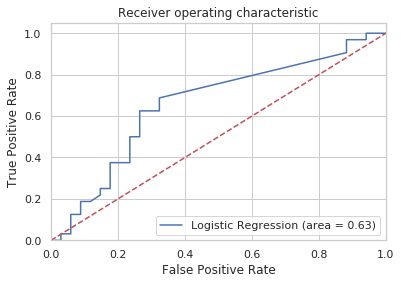